## Import All Library Packages 

In [65]:
!pip install sklearn
!pip install pyspark
!pip install findspark


In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as mp
import sklearn



## Dataset

In [8]:
test_df = pd.read_csv('test.csv',encoding='unicode_escape')
train_df = pd.read_csv('train.csv',encoding = 'unicode_escape')

In [9]:
test_df.shape

(1000, 21)

In [10]:
train_df.shape

(2000, 21)

In [11]:
test_df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [12]:
train_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

## Data Cleaning 

<blockquote>Check the null values from the dataset</blockquote>

In [13]:
pd.isnull(test_df).sum()


id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [14]:
pd.isnull(train_df).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
test_df.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

## Data Visualisation

<blockquote>Cluster Map is used to group some features accroding to their similarity </blockquote>

/var/folders/x_/51w001493fd_0x8p55v92c5w0000gn/T/ipykernel_1455/3234467935.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(train_df.corr(),annot=True,cmap='viridis')


<Figure size 1000x800 with 0 Axes>

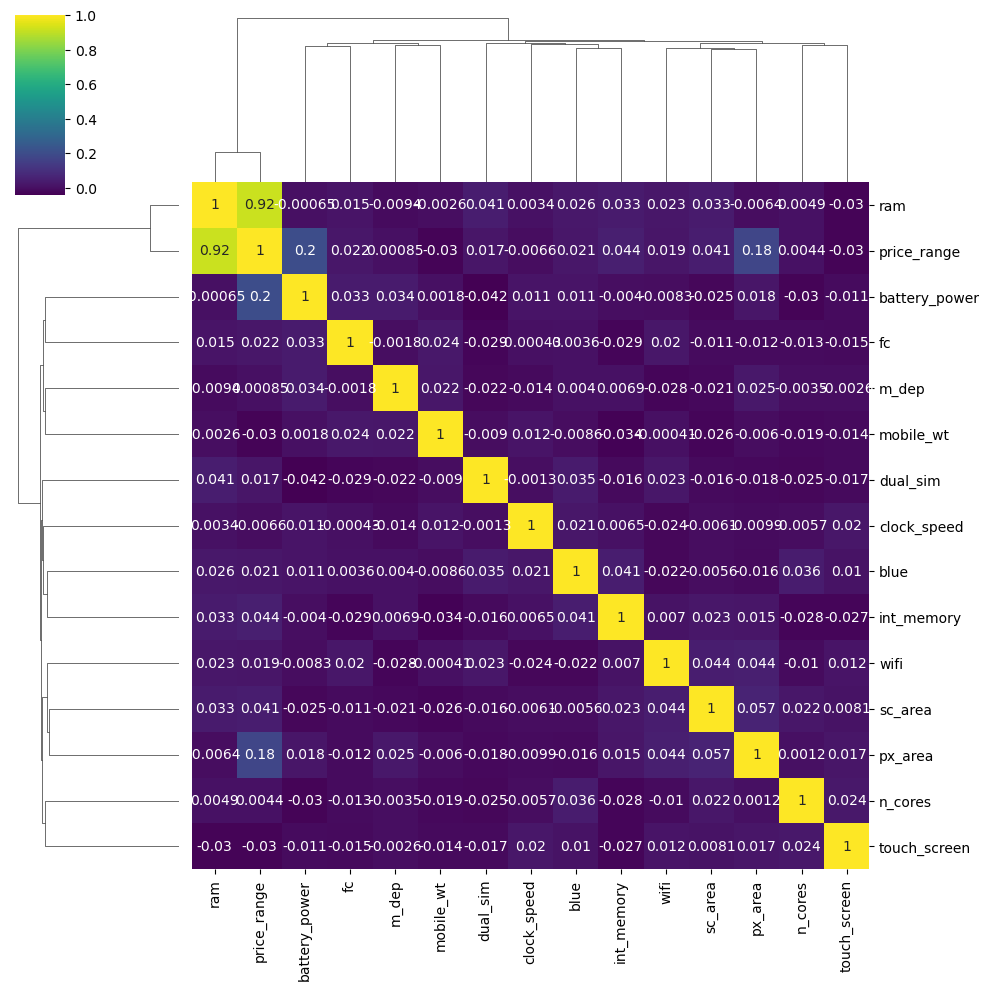

<Figure size 1000x800 with 0 Axes>

In [64]:
sns.clustermap(train_df.corr(),annot=True,cmap='viridis')
mp.figure(figsize=(10,8))

### Create Correlation
<blockquote>The Corr( ) method are used to calculates the relationship between each column of the dataset.</blockquote> 

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

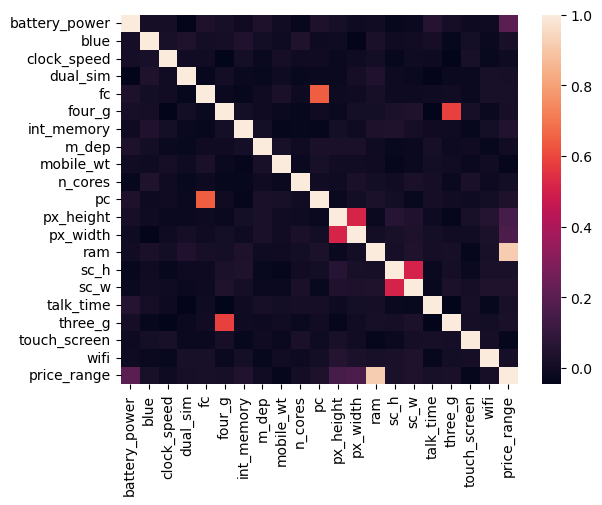

In [320]:
co_rela = train_df.corr()
corr =(co_rela)
sns.heatmap(corr,
                   xticklabels= corr.columns.values,yticklabels= corr.columns.values,)
co_rela

### Create Pairplot
<blockquote>Pair polt takes all the numerical attributes of the data and plot pairwise scatter plot for two different variables and histogram from the same variablesCluster Map is used to group some features accroding to their similarity.</blockquote>

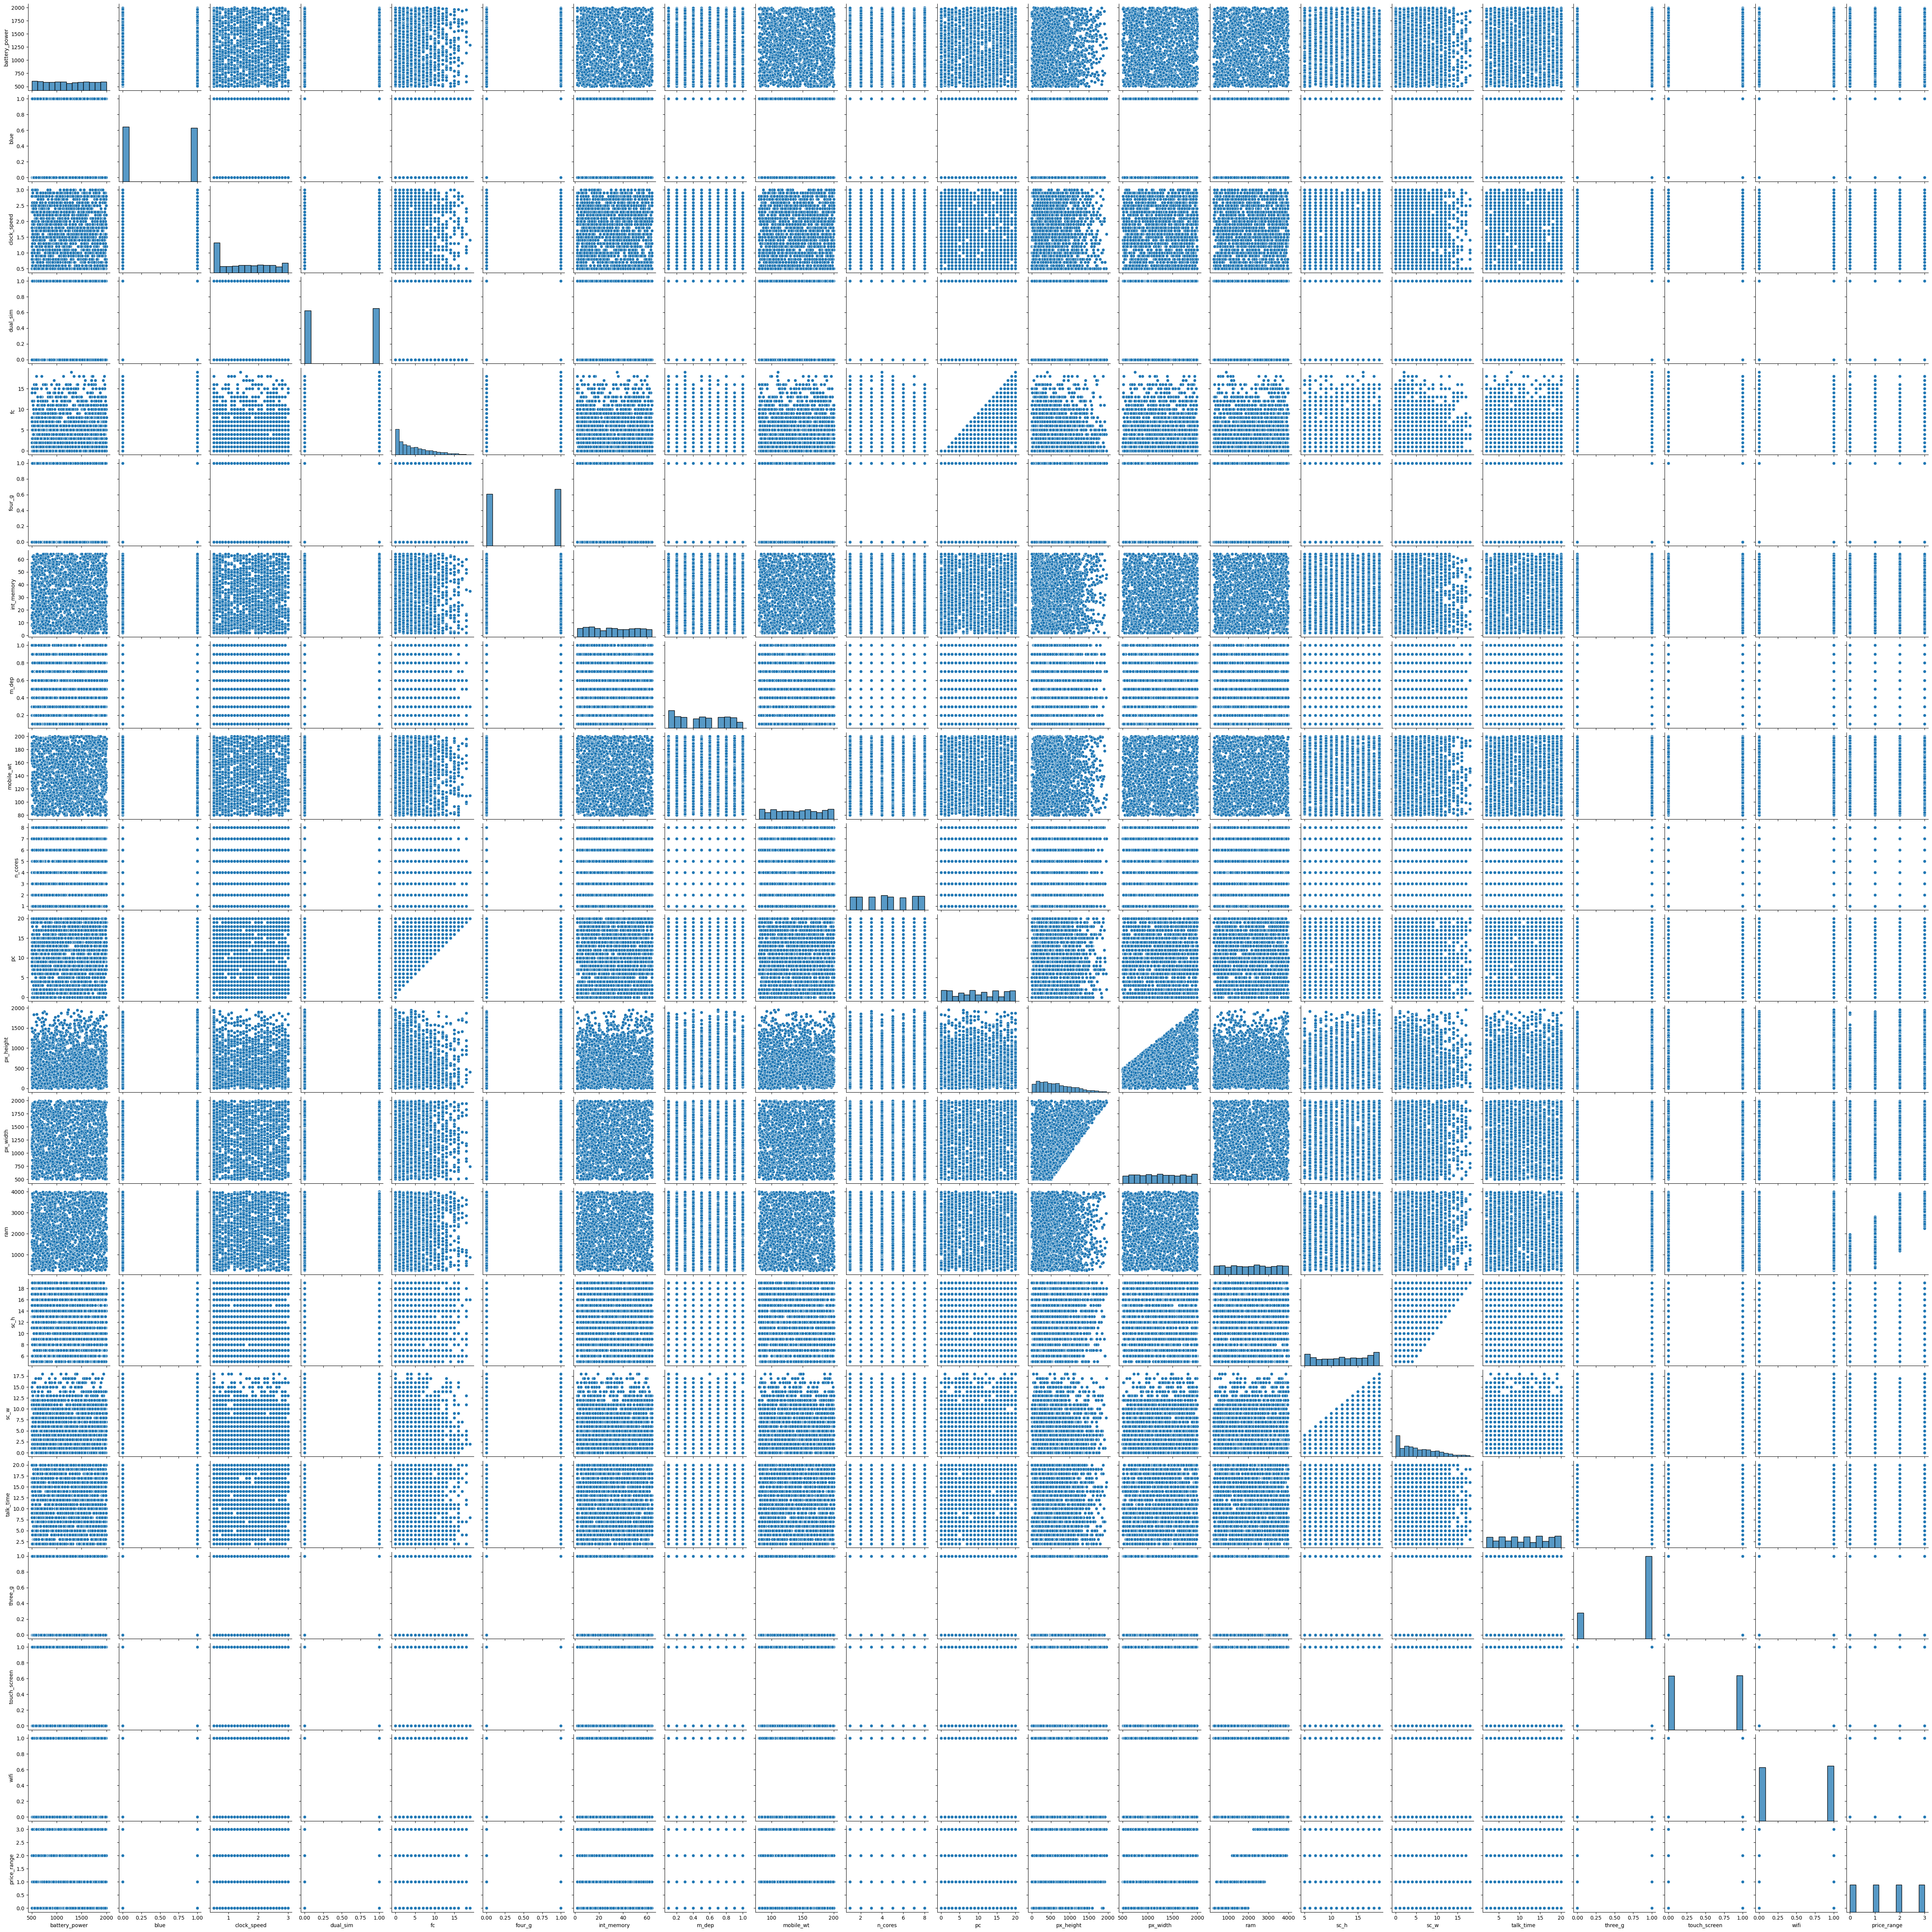

In [324]:

sns.pairplot(train_df)

### Price Vs Battery 

[Text(0.5, 1.0, 'Price vs Battery')]

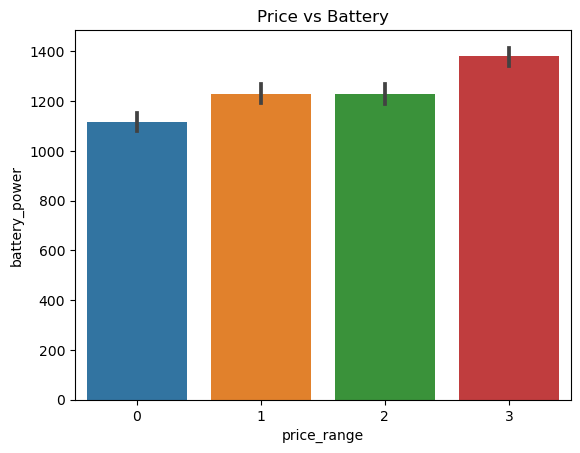

In [323]:
sns.barplot(x=train_df['price_range'],y=train_df['battery_power']).set(title='Price vs Battery')


### Price Vs Clock Speed

[Text(0.5, 1.0, 'Price vs Clock speed')]

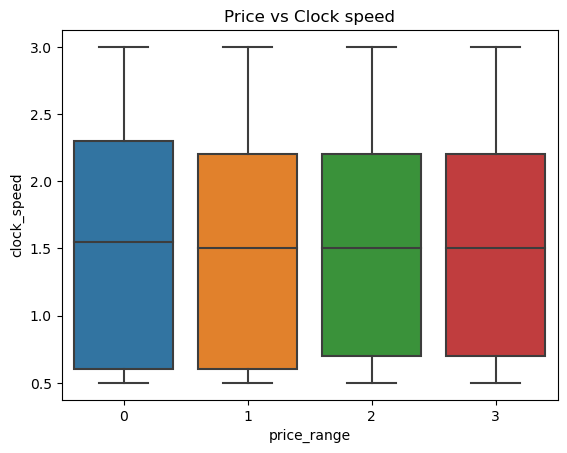

In [325]:
sns.boxplot(x=train_df['price_range'],y=train_df['clock_speed']).set(title='Price vs Clock speed')

### Price Vs Ram

[Text(0.5, 1.0, 'Price vs Ram')]

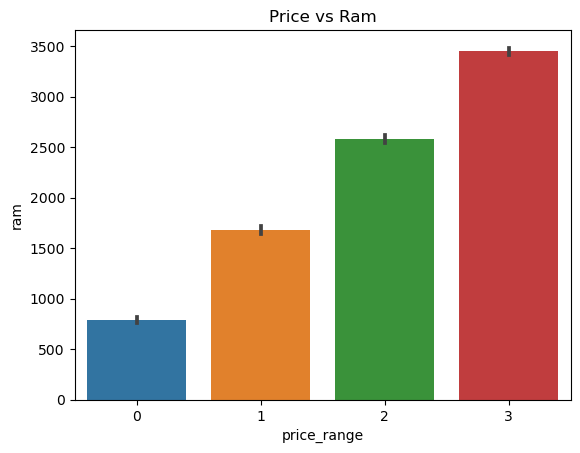

In [326]:
sns.barplot(x=train_df['price_range'],y=train_df['ram']).set(title='Price vs Ram')

### Price Vs Dual Sim

[Text(0.5, 1.0, 'Price vs Dual Sim')]

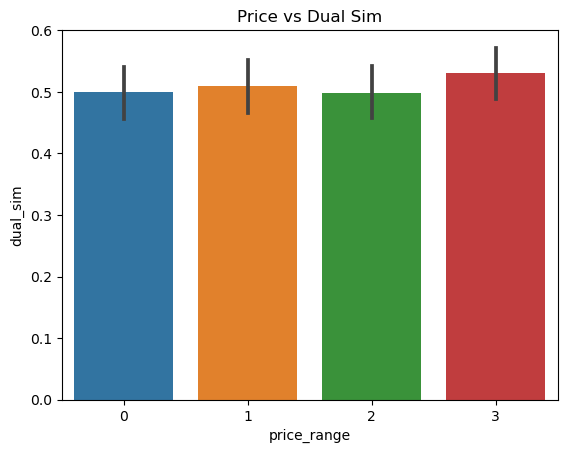

In [327]:
sns.barplot(x=train_df['price_range'],y=train_df['dual_sim']).set(title='Price vs Dual Sim')

### Price Vs Internal Memory

[Text(0.5, 1.0, 'Price vs Internal Memory')]

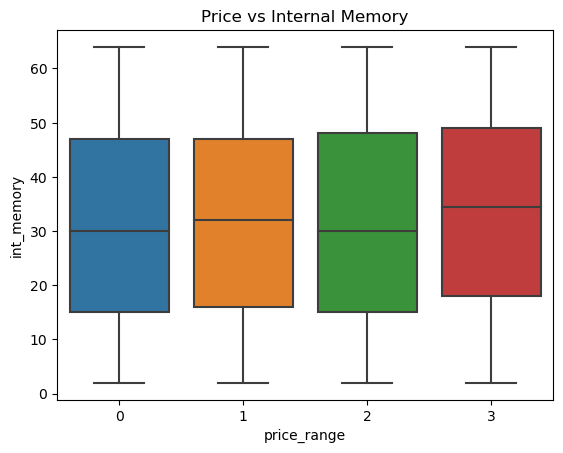

In [328]:
sns.boxplot(x=train_df['price_range'],y=train_df['int_memory']).set(title='Price vs Internal Memory')

### Price Vs Weight 

[Text(0.5, 1.0, 'Price vs Weight')]

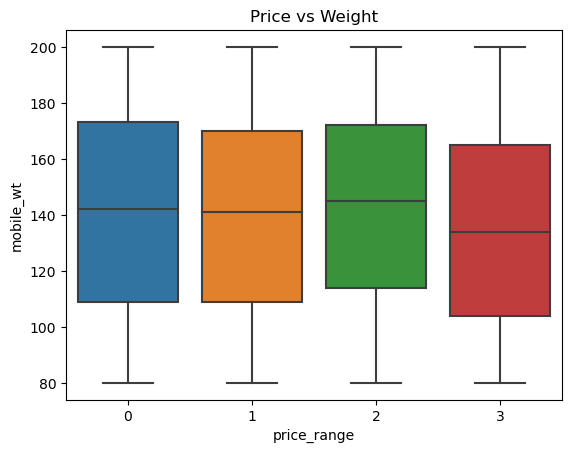

In [17]:
sns.boxplot(x=train_df['price_range'],y=train_df['mobile_wt']).set(title='Price vs Weight')

### Price Vs TalkTime

[Text(0.5, 1.0, 'Price vs TalkTime')]

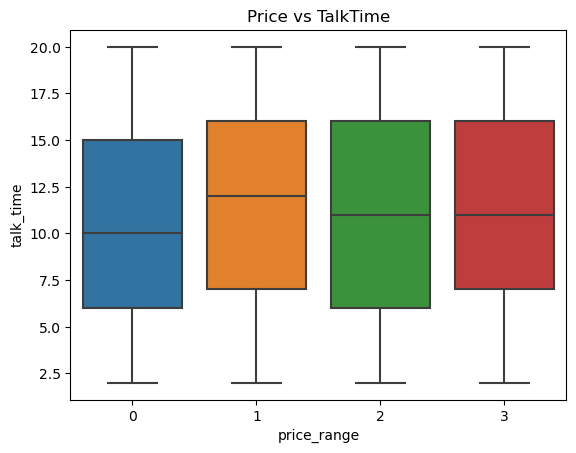

In [18]:
sns.boxplot(x=train_df['price_range'],y=train_df['talk_time']).set(title='Price vs TalkTime')

### Price Vs Pixel

[Text(0.5, 1.0, 'Price vs Pixel')]

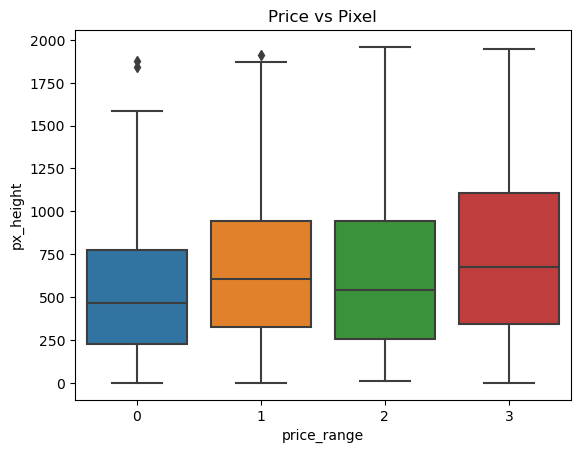

In [19]:
sns.boxplot(x=train_df['price_range'],y=train_df['px_height']).set(title='Price vs Pixel')

### Price Vs Touch Screen

[Text(0.5, 1.0, 'Price vs Touch Screen')]

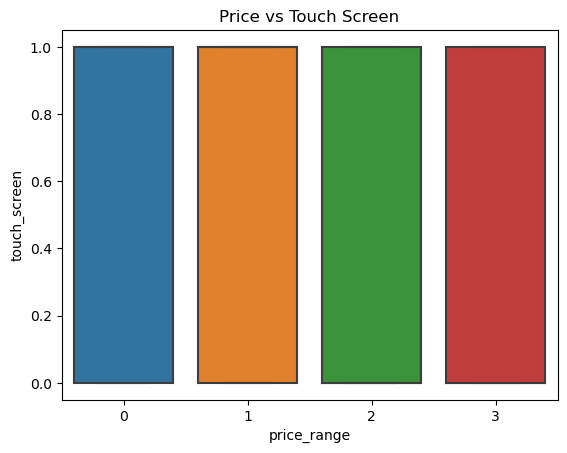

In [20]:
sns.boxplot(x=train_df['price_range'],y=train_df['touch_screen']).set(title='Price vs Touch Screen')

### Price Vs Weight

[Text(0.5, 1.0, 'Price vs Weight')]

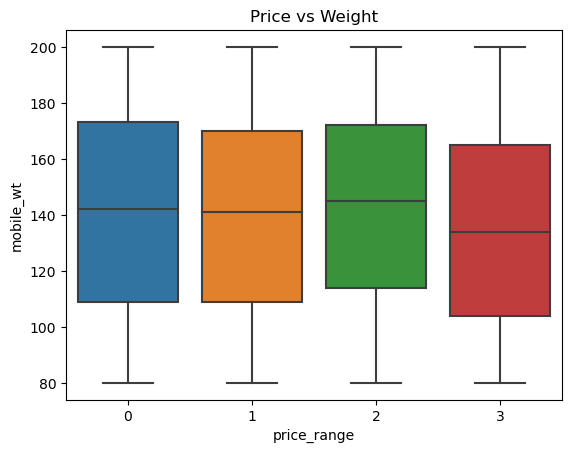

In [21]:
sns.boxplot(x=train_df['price_range'],y=train_df['mobile_wt']).set(title='Price vs Weight')

### Price Vs Cores 

In [22]:
train_df['n_cores'].value_counts().values

array([274, 259, 256, 247, 246, 246, 242, 230])

<Axes: xlabel='n_cores', ylabel='price_range'>

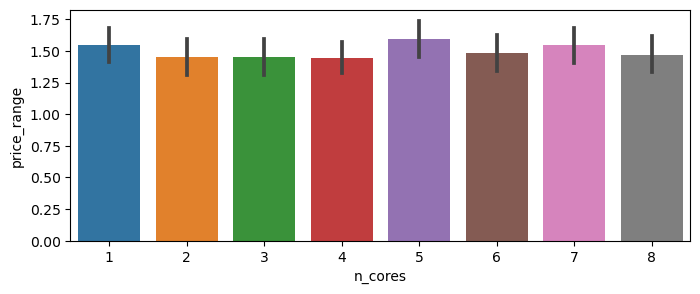

In [23]:
mp.figure(figsize=(8,3))
sns.barplot(x='n_cores',y='price_range',data=train_df)


### Price Vs Processor

[Text(0.5, 1.0, 'Price vs Processor')]

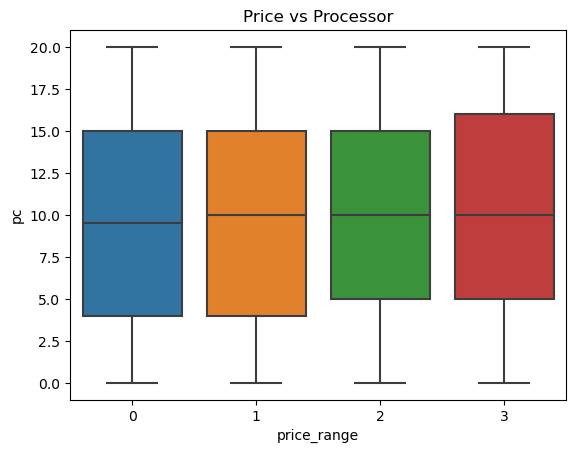

In [24]:
sns.boxplot(x=train_df['price_range'],y=train_df['pc']).set(title='Price vs Processor')

### Mobile support bluetooth or not

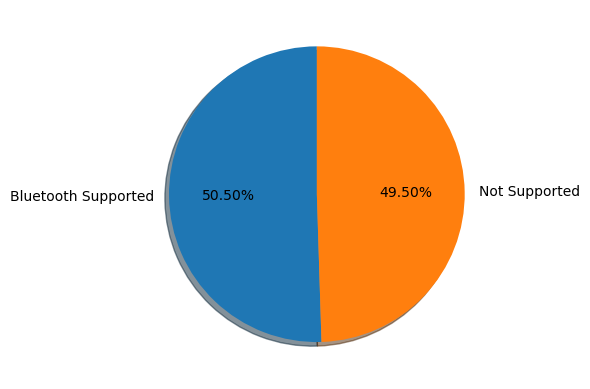

In [25]:
labels = ["Bluetooth Supported","Not Supported"]
values = train_df['blue'].value_counts().values
fig,ax = mp.subplots()
ax.pie(values,labels=labels,autopct = '%1.2f%%',shadow=True,startangle =90)
mp.show()

### Mobile support wifi or not  

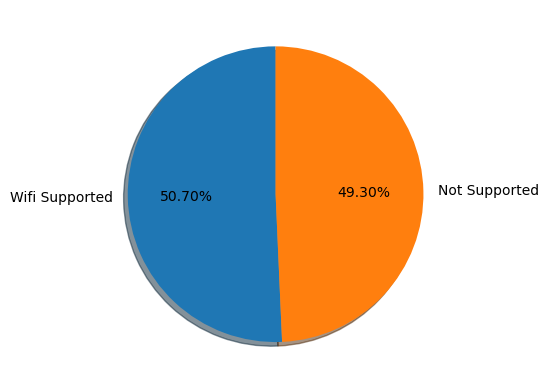

In [26]:
labels = ["Wifi Supported","Not Supported"]
values = train_df['wifi'].value_counts().values
fig,ax = mp.subplots()
ax.pie(values,labels=labels,autopct = '%1.2f%%',shadow=True,startangle =90)
mp.show()

### Mobile Support 3G or not

In [27]:
Phone_3G = train_df['three_g'].sum()
Phone_3G

1523

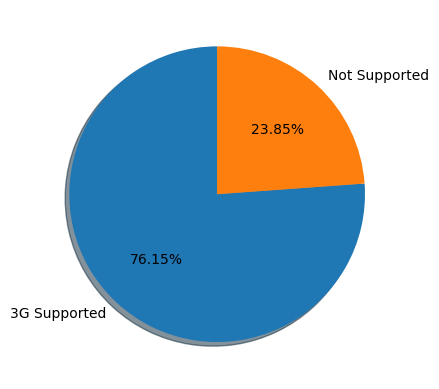

In [28]:
labels = ["3G Supported","Not Supported"]
values = train_df['three_g'].value_counts().values
fig,ax = mp.subplots()
ax.pie(values,labels=labels,autopct = '%1.2f%%',shadow=True,startangle =90)
mp.show()

### Mobile Support 4G or not

In [29]:
Phone_4G = train_df['four_g'].sum()
Phone_4G

1043

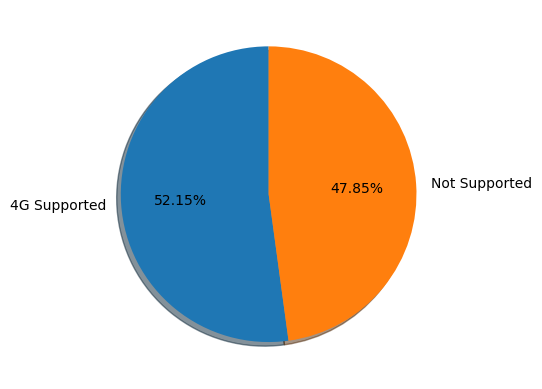

In [30]:
labels = ["4G Supported","Not Supported"]
values = train_df['four_g'].value_counts().values
fig,ax = mp.subplots()
ax.pie(values,labels=labels,autopct = '%1.2f%%',shadow=True,startangle =90)
mp.show()

In [31]:
Phone_2G = Phone_3G - Phone_4G
Phone_2G

480

### Mobile support Touch Screen or not

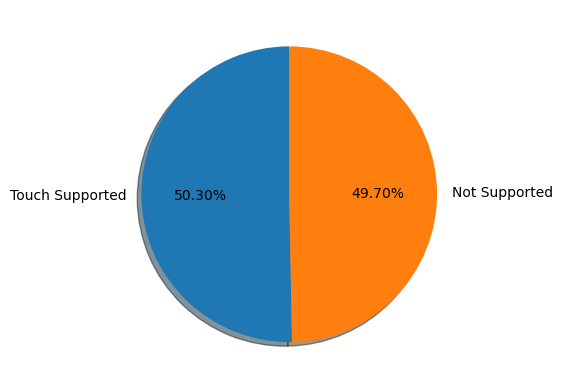

In [59]:
labels = ["Touch Supported","Not Supported"]
values = train_df['touch_screen'].value_counts().values
fig,ax = mp.subplots()
ax.pie(values,labels=labels,autopct = '%1.2f%%',shadow=True,startangle =90)
mp.show()

### Data Combine

In [33]:
# Create a new column 'sc_area' 
train_df['sc_area'] = train_df.sc_h * train_df.sc_w        

# Create a new column 'px_area'
train_df['px_area'] = train_df.px_height * train_df.px_width         

# Create a new column 'network' and assign a default value of '2G'
train_df['network'] = '2G'  

# Use boolean conditions to update the 'network' column based on the values of 'four_g' and 'three_g'
train_df.loc[train_df['four_g'] == 1, 'network'] = '4G'
train_df.loc[train_df['three_g'] == 1, 'network'] = '3G'

train_df


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  sc_h  sc_w  talk_time  three_g  \
0       0.6        188        2  ...     9     7         19        0   
1       0.7        136        3  ...    17     3          7        1   
2       0.9        145        5  ...    11     2          9        1   
3       0.8        131        6  ...    16     8         11        1   
4       0.6        141        2  ...     8     2         15        1   
...     ...        ...      ...  ...   ...   ...        ...      ...   
1995    0.8        106        6  ...    13     4         19        1   
1996    0.2        187        4  ...    11    10         16        1   
1997    0.7        108        8  ...     9     1          5        1   
1998    0.1        145        5  ...    18    10         19        1   
1999    0.9        168        6  ...    19     4          2        1   

      touch_screen  wifi  price_range  sc_area  px_area  network  
0                0     1            1       63    15120       2G  
1                1     0            2       51  1799140       3G  
2                1     0            2       22  2167308       3G  
3                0     0            2      128  2171776       3G  
4                1     0            1       16  1464096       3G  
...            ...   ...          ...      ...      ...      ...  
1995             1     0            0       52  2309580       3G  
1996             1     1            2      110  1797975       3G  
1997             1     0            3        9  1416576       3G  
1998             1     1            0      180   225120       3G  
1999             1     1            3       76   364182       3G  

[2000 rows x 24 columns]

In [34]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'sc_area', 'px_area', 'network'],
      dtype='object')

In [35]:
train_df=train_df.drop(columns=['three_g','four_g','px_height','px_width','sc_h','sc_w','pc','talk_time'])

In [36]:
train_df

battery_power  blue  clock_speed  dual_sim  fc  int_memory  m_dep  \
0               842     0          2.2         0   1           7    0.6   
1              1021     1          0.5         1   0          53    0.7   
2               563     1          0.5         1   2          41    0.9   
3               615     1          2.5         0   0          10    0.8   
4              1821     1          1.2         0  13          44    0.6   
...             ...   ...          ...       ...  ..         ...    ...   
1995            794     1          0.5         1   0           2    0.8   
1996           1965     1          2.6         1   0          39    0.2   
1997           1911     0          0.9         1   1          36    0.7   
1998           1512     0          0.9         0   4          46    0.1   
1999            510     1          2.0         1   5          45    0.9   

      mobile_wt  n_cores   ram  touch_screen  wifi  price_range  sc_area  \
0           188        2  2549             0     1            1       63   
1           136        3  2631             1     0            2       51   
2           145        5  2603             1     0            2       22   
3           131        6  2769             0     0            2      128   
4           141        2  1411             1     0            1       16   
...         ...      ...   ...           ...   ...          ...      ...   
1995        106        6   668             1     0            0       52   
1996        187        4  2032             1     1            2      110   
1997        108        8  3057             1     0            3        9   
1998        145        5   869             1     1            0      180   
1999        168        6  3919             1     1            3       76   

      px_area network  
0       15120      2G  
1     1799140      3G  
2     2167308      3G  
3     2171776      3G  
4     1464096      3G  
...       ...     ...  
1995  2309580      3G  
1996  1797975      3G  
1997  1416576      3G  
1998   225120      3G  
1999   364182      3G  

[2000 rows x 16 columns]

In [37]:
type(train_df)

pandas.core.frame.DataFrame

In [38]:
network_indexer =[ 'network']
encoded_data = pd.get_dummies(train_df, columns=network_indexer)
print(encoded_data.head())

   battery_power  blue  clock_speed  dual_sim  fc  int_memory  m_dep  \
0            842     0          2.2         0   1           7    0.6   
1           1021     1          0.5         1   0          53    0.7   
2            563     1          0.5         1   2          41    0.9   
3            615     1          2.5         0   0          10    0.8   
4           1821     1          1.2         0  13          44    0.6   

   mobile_wt  n_cores   ram  touch_screen  wifi  price_range  sc_area  \
0        188        2  2549             0     1            1       63   
1        136        3  2631             1     0            2       51   
2        145        5  2603             1     0            2       22   
3        131        6  2769             0     0            2      128   
4        141        2  1411             1     0            1       16   

   px_area  network_2G  network_3G  
0    15120           1           0  
1  1799140           0           1  
2  2167308       

In [39]:
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'ram',
       'touch_screen', 'wifi', 'price_range', 'sc_area', 'px_area', 'network']
      

In [40]:
train_df['features'] = train_df[features].values.tolist()
print(train_df.head())

   battery_power  blue  clock_speed  dual_sim  fc  int_memory  m_dep  \
0            842     0          2.2         0   1           7    0.6   
1           1021     1          0.5         1   0          53    0.7   
2            563     1          0.5         1   2          41    0.9   
3            615     1          2.5         0   0          10    0.8   
4           1821     1          1.2         0  13          44    0.6   

   mobile_wt  n_cores   ram  touch_screen  wifi  price_range  sc_area  \
0        188        2  2549             0     1            1       63   
1        136        3  2631             1     0            2       51   
2        145        5  2603             1     0            2       22   
3        131        6  2769             0     0            2      128   
4        141        2  1411             1     0            1       16   

   px_area network                                           features  
0    15120      2G  [842, 0, 2.2, 0, 1, 7, 0.6, 188, 2, 

# Model Training and Feature Selection

## Creating Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC



In [43]:
# Split the dataset into features (X) and target variable (y)

X = train_df.drop('price_range', axis=1)
y = train_df['price_range']


# Handle non-numeric values using label encoding
encoder = LabelEncoder()
X_encoded = X.apply(lambda x: encoder.fit_transform(x.astype(str)) if x.dtype != 'int64' else x)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Create a decision tree classifier
dt_model = DecisionTreeClassifier()


# Fit the classifier to the training data
dt_model .fit(X_train, y_train)

#pipeline = make_pipeline(dt_model)
#pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model .predict(X_test)
y_pre = dt_model .predict(X_train)

#y_pre = pipeline.predict(X_test)


# Evaluate the accuracy of the classifier
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pre)

print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.8325
Train Accuracy: 1.0


## Random Forest Model

In [49]:
# Handle non-numeric values using label encoding
encoder = LabelEncoder()
X_encoded = X.apply(lambda x: encoder.fit_transform(x.astype(str)) if x.dtype != 'int64' else x)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X_train, y_train)


# Make predictions on the test set
y_pred = rf.predict(X_test)
y_pre = rf.predict(X_train)


# Evaluate the accuracy of the classifier
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pre)


print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)


Test Accuracy: 0.905
Train Accuracy: 1.0


## SVM 

In [54]:
# Handle non-numeric values using label encoding
encoder = LabelEncoder()
X_encoded = X.apply(lambda x: encoder.fit_transform(x.astype(str)) if x.dtype != 'int64' else x)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a random forest classifier
model = SVC()

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))


Train Accuracy:30.312499999999996
Test Accuracy:31.25

Confusion Matrix:
[[61 49 56 40]
 [28 19 17 27]
 [ 0  0  0  0]
 [16 23 19 45]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.58      0.30      0.39       206
           1       0.21      0.21      0.21        91
           2       0.00      0.00      0.00         0
           3       0.40      0.44      0.42       103

    accuracy                           0.31       400
   macro avg       0.30      0.24      0.25       400
weighted avg       0.45      0.31      0.36       400



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Comparision ( Decision Tree Vs Random Forest Vs  SVM )

In [55]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    
}

In [56]:
results = {}

for classifier_name, classifier in classifiers.items():
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    results[classifier_name] = accuracy

In [57]:
print("Model Comparison - Accuracy Scores:")
for classifier_name, accuracy in results.items():
    print(f"{classifier_name}: {accuracy}")


Model Comparison - Accuracy Scores:
Decision Tree: 0.8325
Random Forest: 0.8775
SVM: 0.3125


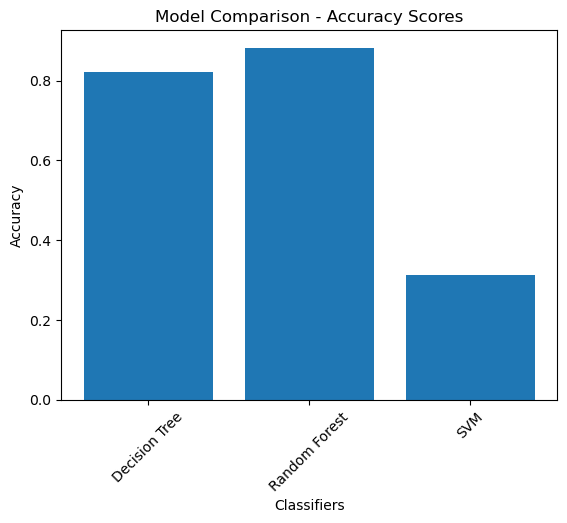

In [351]:
# Plot the accuracy scores
classifiers_names = list(results.keys())
accuracy_scores = list(results.values())

mp.bar(classifiers_names, accuracy_scores)
mp.xlabel('Classifiers')
mp.ylabel('Accuracy')
mp.title('Model Comparison - Accuracy Scores')
mp.xticks(rotation=45)
mp.show()

### After comparing all the models ,we can see that the Random forest model giving the highest accuracy and then Decision Tree giving the second highest accuracy . The SVM model giving low accuracy.


## Conclusion 

### In this analysis,I think mobile features are most important deciding factors while estimating the price range for the device.
### Features like internal memory,battery power,ram,network connectivity (2G,3G,4G),dual sim ,clock speed,processors are the most important features for prediction the device price range.